In [ ]:
#recidual errors

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from google.colab import files
import pandas as pd

upload =files.upload()
a=list(upload.keys())[0]
df = pd.read_csv(a)
df

Saving Cars.csv to Cars (1).csv


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.shape

(81, 5)

In [ ]:
df.isnull().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
df_new=df[['HP','MPG','VOL','SP','WT']]
df_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df_new.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


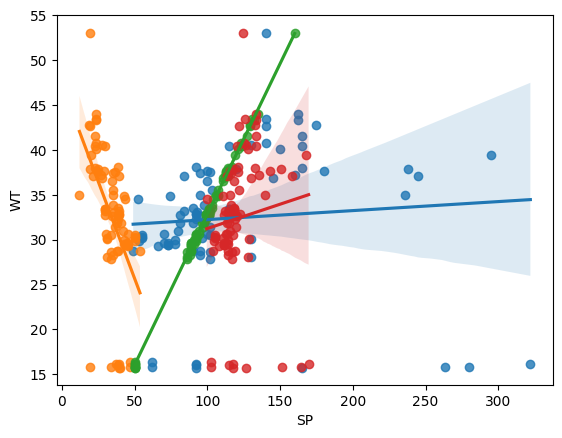

In [ ]:
import seaborn as sns
sns.regplot(x='HP',y='WT',data=df);
sns.regplot(x='MPG',y='WT',data=df);
sns.regplot(x='VOL',y='WT',data=df);
sns.regplot(x='SP',y='WT',data=df);

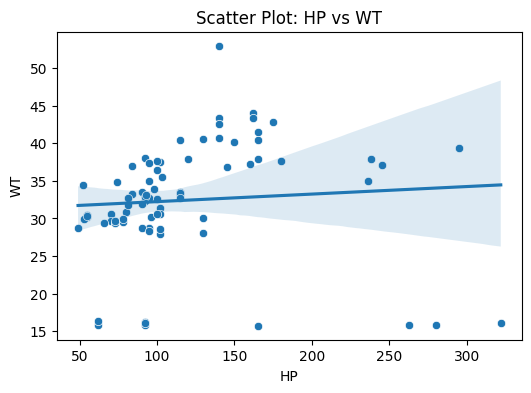

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.scatterplot(x='HP', y='WT', data=df)
sns.regplot(x='HP', y='WT', data=df, scatter=False)
plt.title("Scatter Plot: HP vs WT")
plt.show()

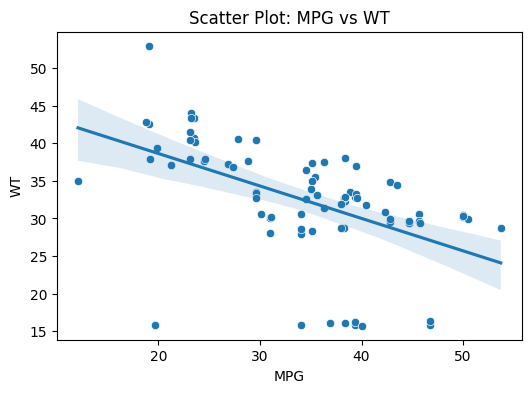

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.scatterplot(x='MPG', y='WT', data=df)
sns.regplot(x='MPG', y='WT', data=df, scatter=False)
plt.title("Scatter Plot: MPG vs WT")
plt.show()

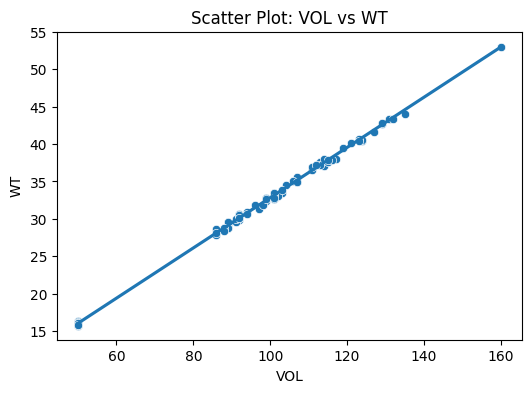

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.scatterplot(x='VOL', y='WT', data=df)
sns.regplot(x='VOL', y='WT', data=df, scatter=False)
plt.title("Scatter Plot: VOL vs WT")
plt.show()

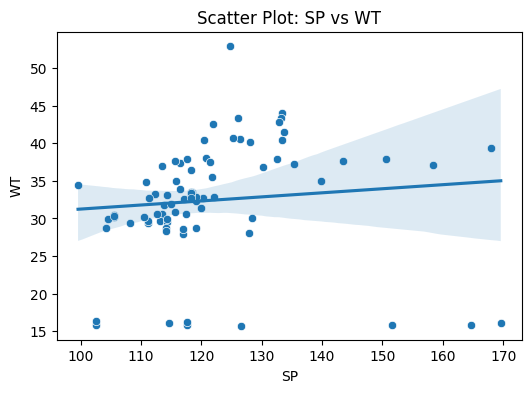

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.scatterplot(x='SP', y='WT', data=df)
sns.regplot(x='SP', y='WT', data=df, scatter=False)
plt.title("Scatter Plot: SP vs WT")
plt.show()

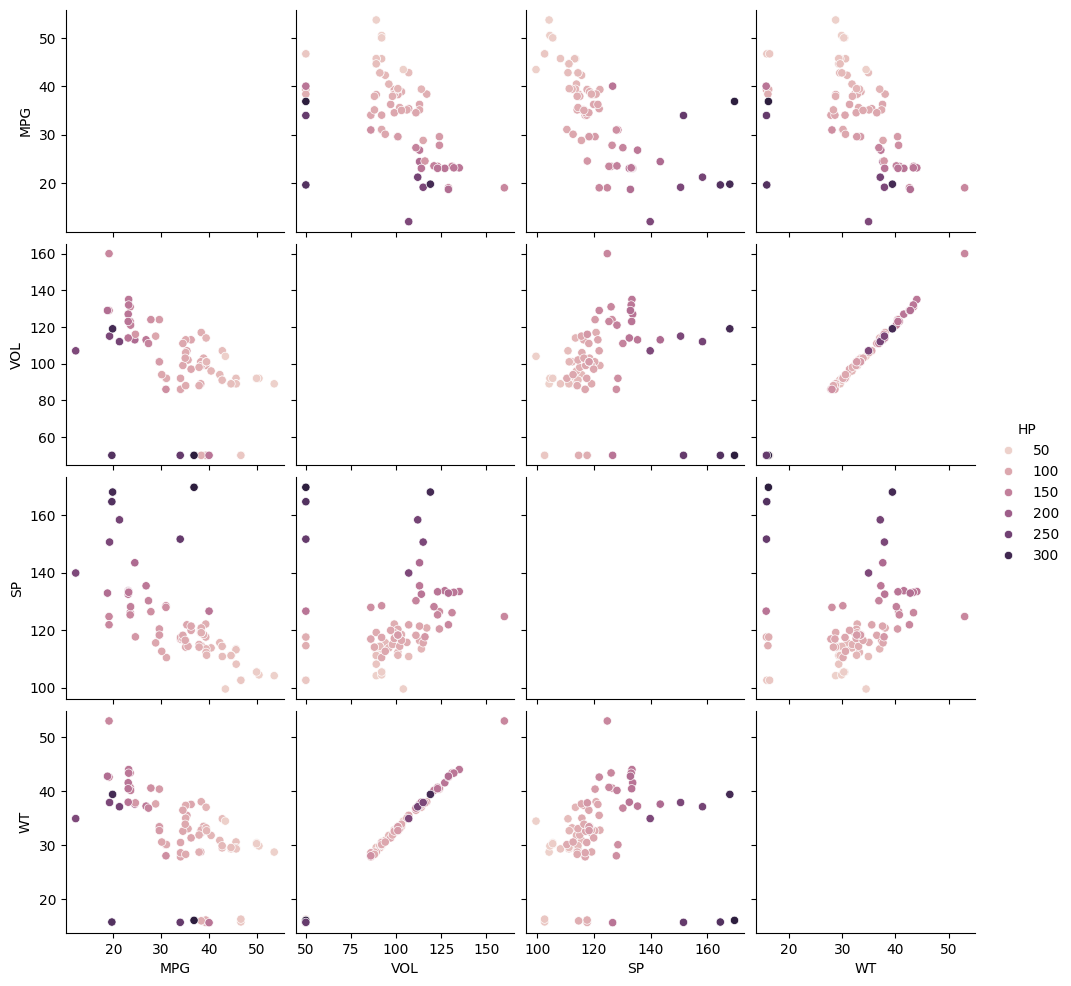

In [ ]:
sns.pairplot(df, hue='HP', diag_kind='WT')
plt.show()

In [ ]:

# Splitting data into independent (X) and dependent (y) variables
X = df.drop(columns=['TargetColumn'])  # Replace 'TargetColumn' with actual dependent variable
y = df['TargetColumn']

# Adding constant for statsmodels
import statsmodels.api as sm
X_const = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X_const).fit()

# R-squared value
print("R-squared:", model.rsquared)

# Variance Inflation Factor (VIF) Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))] # +1 to skip constant
print(vif_data)

# Residuals Analysis
residuals = model.resid
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
